# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
df = sinasc_raw[['munResLat', 'QTDFILMORT', 'munResArea']].copy()
df.loc[df['munResLat'] <= -10.5, 'faixa'] = 'menor'
df.loc[df['munResLat'] > -10.5, 'faixa'] = 'maior'

df.drop('munResLat', axis=1, inplace=True)
df.groupby('faixa').describe()

QTDFILMORT                                               munResArea  \
           count      mean       std  min  25%  50%  75%   max      count   
faixa                                                                       
maior    12126.0  0.291770  0.627856  0.0  0.0  0.0  0.0   9.0    14034.0   
menor    12803.0  0.242521  0.599430  0.0  0.0  0.0  0.0  28.0    12993.0   

                                                                            \
               mean           std      min       25%        50%        75%   
faixa                                                                        
maior  22357.926110  14488.909375  965.676  4426.571  34096.394  34096.394   
menor   6434.344207   5688.822159  459.978  1969.850   5067.384   7067.025   

                  
             max  
faixa             
maior  34096.394  
menor  24855.724

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
df = sinasc_raw[['munResArea', 'CONSULTAS', 'ESTCIVMAE']].copy()
df.loc[df['munResArea'] <= 3000, 'faixa'] = 'menor'
df.loc[df['munResArea'] > 3000, 'faixa'] = 'maior'

df.drop('munResArea', axis=1, inplace=True)
df.groupby('faixa').describe()

CONSULTAS                                              ESTCIVMAE  \
          count      mean       std  min  25%  50%  75%  max     count   
faixa                                                                    
maior   21808.0  3.537326  0.820967  1.0  3.0  4.0  4.0  9.0   21537.0   
menor    5219.0  3.740180  0.607492  1.0  4.0  4.0  4.0  9.0    5173.0   

                                                    
           mean       std  min  25%  50%  75%  max  
faixa                                               
maior  2.537169  1.691778  1.0  1.0  2.0  5.0  9.0  
menor  2.578774  1.582431  1.0  1.0  2.0  5.0  9.0

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
df = sinasc_raw[['munResAlt', 'APGAR5', 'IDANOMAL']].copy()
df.loc[df['munResAlt'] <= 200, 'faixa'] = 'menor'
df.loc[df['munResAlt'] > 200, 'faixa'] = 'maior'

df.drop('munResAlt', axis=1, inplace=True)
df.groupby('faixa').describe()

APGAR5                                                IDANOMAL  \
         count      mean       std  min  25%  50%   75%   max    count   
faixa                                                                    
maior   6185.0  9.121099  0.808099  0.0  9.0  9.0  10.0  10.0   6186.0   
menor  20739.0  9.196441  0.784460  0.0  9.0  9.0  10.0  10.0  20250.0   

                                                    
           mean       std  min  25%  50%  75%  max  
faixa                                               
maior  2.006790  0.319082  1.0  2.0  2.0  2.0  9.0  
menor  2.037136  0.571435  1.0  2.0  2.0  2.0  9.0

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [12]:
dct = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d\'Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Alta Floresta d\'Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d\'Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d\'Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d\'Oeste': 'Cacoal',
    'São Felipe d\'Oeste': 'Cacoal',
    'Alvorada d\'Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
    }

<AxesSubplot:xlabel='DTNASC', ylabel='IDADEMAE'>

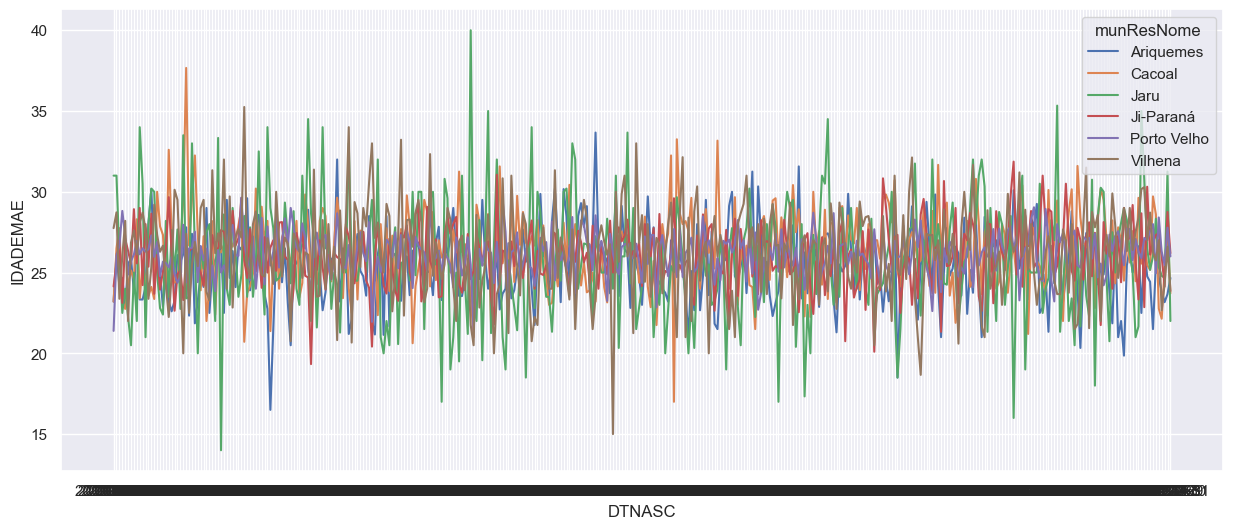

In [38]:
import seaborn as sns
df = sinasc_raw[['IDADEMAE', 'munResNome', 'DTNASC']].copy()
df.set_index('munResNome', inplace=True)
df_graf = df.groupby([dct, 'DTNASC']).mean().reset_index(drop=False)

sns.set(style='darkgrid')  # Configuração do estilo do gráfico
plt.figure(figsize=(15, 6))  # Configuração do tamanho da figura
sns.lineplot(data=df_graf, x='DTNASC', y='IDADEMAE', hue='munResNome')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [41]:
data = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    'Pimenta Bueno': 0.710,
    'Ariquemes': 0.702,
    'Rolim de Moura': 0.700,
    'Cerejeiras': 0.692,
    'Jaru': 0.689,
    'Colorado do Oeste': 0.685,
    'Ouro Preto do Oeste': 0.682,
    'Espigão d\'Oeste': 0.672,
    'Santa Luzia d\'Oeste': 0.670,
    'Pimenteiras do Oeste': 0.665,
    'Presidente Médici': 0.664,
    'Castanheiras': 0.658,
    'Guajará-Mirim': 0.657,
    'Chupinguaia': 0.652,
    'Cabixi': 0.650,
    'Candeias do Jamari': 0.649,
    'São Felipe d\'Oeste': 0.649,
    'Cacaulândia': 0.646,
    'São Miguel do Guaporé': 0.646,
    'Mirante da Serra': 0.643,
    'Alvorada d\'Oeste': 0.643,
    'Teixeirópolis': 0.643,
    'Nova Brasilândia d\'Oeste': 0.643,
    'Rio Crespo': 0.643,
    'Primavera de Rondônia': 0.641,
    'Alta Floresta d\'Oeste': 0.641,
    'Ministro Andreazza': 0.638,
    'Novo Horizonte do Oeste': 0.634,
    'Vale do Paraíso': 0.627,
    'Alto Paraíso': 0.625,
    'Parecis': 0.617,
    'Buritis': 0.616,
    'Itapuã do Oeste': 0.614,
    'Corumbiara': 0.613,
    'Cujubim': 0.612,
    'Costa Marques': 0.611,
    'São Francisco do Guaporé': 0.611,
    'Urupá': 0.609,
    'Monte Negro': 0.607,
    'Seringueiras': 0.598,
    'Governador Jorge Teixeira': 0.596,
    'Machadinho d\'Oeste': 0.596,
    'Campo Novo de Rondônia': 0.593,
    'Alto Alegre dos Parecis': 0.592,
    'Theobroma': 0.589,
    'Nova União': 0.587,
    'Nova Mamoré': 0.587,
    'Vale do Anari': 0.584
}


In [55]:
df = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
df['IDH municipal'] = df['munResNome'].map(data)
df.dropna(axis=0, inplace=True)
df.loc[df['IDH municipal'] < 0.600, 'classificacao'] = 'baixo'
df.loc[df['IDH municipal'] >= 0.600, 'classificacao'] = 'medio'
df.loc[df['IDH municipal'] >= 0.700, 'classificacao'] = 'alto'
df.groupby('classificacao').mean()


,IDADEMAE,IDH municipal
classificacao,,
alto,26.280332,0.724795
baixo,25.269231,0.590422
medio,25.848191,0.649176


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [60]:
dct = {
    'Ariquemes': '0.7746',
    'Vilhena': '0.7465',
    'Pimenta Bueno': '0.7383',
    'Porto Velho': '0.7257',
    'Ji-Paraná': '0.7117',
    'Cacoal': '0.7111',
    'Santa Luzia d\'Oeste': '0.6850',
    'Rolim de Moura': '0.6785',
    'Chupinguaia': '0.6766',
    'São Miguel do Guaporé': '0.6699',
    'Pimenteiras do Oeste': '0.6501',
    'Teixeirópolis': '0.6500',
    'Colorado do Oeste': '0.6473',
    'Jaru': '0.6450',
    'Rio Crespo': '0.6430',
    'Primavera de Rondônia': '0.6384',
    'Alta Floresta d\'Oeste': '0.6337',
    'Ouro Preto do Oeste': '0.6261',
    'São Francisco do Guaporé': '0.6214',
    'Candeias do Jamari': '0.6199',
    'São Felipe d\'Oeste': '0.6153',
    'Presidente Médici': '0.6140',
    'Cerejeiras': '0.6137',
    'Monte Negro': '0.6016',
    'Urupá': '0.6006',
    'Espigão d\'Oeste': '0.5973',
    'Seringueiras': '0.5922',
    'Alvorada d\'Oeste': '0.5919',
    'Itapuã do Oeste': '0.5903',
    'Cabixi': '0.5887',
    'Novo Horizonte do Oeste': '0.5858',
    'Nova Brasilândia d\'Oeste': '0.5857',
    'Vale do Paraíso': '0.5818',
    'Corumbiara': '0.5759',
    'Alto Paraíso': '0.5735',
    'Cacaulândia': '0.5721',
    'Vale do Anari': '0.5710',
    'Ministro Andreazza': '0.5657',
    'Costa Marques': '0.5626',
    'Nova União': '0.5571',
    'Guajará-Mirim': '0.5541',
    'Mirante da Serra': '0.5519',
    'Parecis': '0.5502',
    'Castanheiras': '0.5430',
    'Theobroma': '0.5405',
    'Machadinho d\'Oeste': '0.5322',
    'Campo Novo de Rondônia': '0.5272',
    'Nova Mamoré': '0.5084',
    'Cujubim': '0.5055',
    'Alto Alegre dos Parecis': '0.5046',
    'Governador Jorge Teixeira': '0.4562'
}

In [63]:
df = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
df['IFDM'] = df['munResNome'].map(dct)
df.dropna(axis=0, inplace=True)
df.loc[df['IFDM'].astype(float) < 0.600, 'classificacao'] = 'regular'
df.loc[df['IFDM'].astype(float) >= 0.600, 'classificacao'] = 'moderado'
df.groupby('classificacao').mean()


,IDADEMAE
classificacao,
moderado,26.245598
regular,25.412005


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [66]:
dct = {
    'Porto Velho': 17912070,
    'Ji-Paraná': 3783972,
    'Vilhena': 2831175,
    'Ariquemes': 2579830,
    'Cacoal': 2261644,
    'Jaru': 1500890,
    'Rolim de Moura': 1283434,
    'Pimenta Bueno': 1164877,
    'Guajará-Mirim': 893000,
    'Ouro Preto do Oeste': 834000,
    'Buritis': 726000,
    'Machadinho do Oeste': 633000,
    'Espigão d\'Oeste': 625000,
    'São Miguel do Guaporé': 616000,
    'Candeias do Jamari': 548000,
    'Nova Mamoré': 529000,
    'Cerejeiras': 507000,
    'Alta Floresta do Oeste': 496000,
    'Presidente Médici': 428000,
    'Cujubim': 385000,
    'Nova Brasilândia do Oeste': 360000,
    'Alto Paraíso': 358000,
    'São Francisco do Guaporé': 353000,
    'Colorado do Oeste': 335000,
    'Monte Negro': 219152,
    'Alto Alegre dos Parecis': 213410,
    'Campo Novo de Rondônia': 208821,
    'Alvorada do Oeste': 204098,
    'Chupinguaia': 190331,
    'Corumbiara': 188218,
    'Ministro Andreazza': 174633,
    'Urupá': 172143,
    'Costa Marques': 171878,
    'Seringueiras': 169429,
    'Mirante da Serra': 163955,
    'Governador Jorge Teixeira': 148027,
    'Theobroma': 140601,
    'Santa Luzia do Oeste': 135934,
    'Novo Horizonte do Oeste': 129399,
    'Itapuã do Oeste': 129351,
    'Vale do Paraíso': 116742,
    'Cacaulândia': 116635,
    'Cabixi': 113031,
    'Vale do Anari': 105208,
    'Nova União': 92346,
    'Parecis': 80759,
    'Rio Crespo': 76854,
    'Pimenteiras do Oeste': 76756,
    'Teixeirópolis': 72089,
    'São Felipe do Oeste': 72084,
    'Castanheiras': 59779,
    'Primavera de Rondônia': 52908
}


In [68]:
df = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
df['pib'] = df['munResNome'].map(dct)
df.dropna(axis=0, inplace=True)
df.loc[df['pib'].astype(float) < 100000, 'classificacao'] = 'Até 100mi'
df.loc[df['pib'].astype(float) >= 100000, 'classificacao'] = 'Acima de 100mi'
df.loc[df['pib'].astype(float) >= 200000, 'classificacao'] = 'Acima de 200mi'
df.loc[df['pib'].astype(float) >= 300000, 'classificacao'] = 'Acima de 300mi'
df.loc[df['pib'].astype(float) >= 500000, 'classificacao'] = 'Acima de 500mi'
df.loc[df['pib'].astype(float) >= 1000000, 'classificacao'] = 'Acima de 1bi'
df.groupby('classificacao').mean()

,IDADEMAE,pib
classificacao,,
Acima de 100mi,25.638424,1.554772e+05
Acima de 1bi,26.265562,9.848892e+06
Acima de 200mi,25.146435,2.141439e+05
Acima de 300mi,25.706070,3.742764e+05
Acima de 500mi,25.785927,7.148945e+05
Até 100mi,26.519894,7.658352e+04


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

##### Resposta:
Descobri que a idade media das mae no maior e menor PIB sao proximas, sendo a de menor pib a maior